# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas as pd


# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt


#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [12]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
path_properties_pickle = "properties_df.pkl"
# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
try:
    properties = pd.read_pickle(path_properties_pickle)
except:
    properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None, engine='openpyxl')
    properties.to_pickle(path_properties_pickle)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [13]:
properties.head()
#Col: Unnamed is a natural choice for Index given its datatype and our understanding of the project.
#Row: 0 seems to be have identifiers for the boroughs and various regions.

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Unnamed: 49,Unnamed: 50
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001,NaN,NaN
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128,NaN,NaN
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549,NaN,NaN
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843,NaN,NaN
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548,NaN,NaN


In [311]:
properties.info()
#Cols without value look like they seperate different groups of regions. Could be used to compare trends
#We could try to see if we could identify these groups by commonalities in the E...... numbers.
#In that case, we could also remove the all-NaN columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            310 non-null    datetime64[ns]
 1   City of London        311 non-null    object        
 2   Barking & Dagenham    311 non-null    object        
 3   Barnet                311 non-null    object        
 4   Bexley                311 non-null    object        
 5   Brent                 311 non-null    object        
 6   Bromley               311 non-null    object        
 7   Camden                311 non-null    object        
 8   Croydon               311 non-null    object        
 9   Ealing                311 non-null    object        
 10  Enfield               311 non-null    object        
 11  Greenwich             311 non-null    object        
 12  Hackney               311 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [327]:
properties2 = properties.copy()
properties2 = properties2.T #Index now has: ['Unnamed: 0', 'City of London', 'Barking & Dagenham',...]
properties2.reset_index(inplace=True) #Index now normalized: [0, 1, 2, ...]
properties2.columns = properties2.iloc[0,:] #set column names using the first row
properties2 = properties2.iloc[1:,:]  #filter out the first row
properties2.head() #new dataframe
#Note that the columns now has Dates

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,773679.128,792769.106,828657.9294,900125.798,904803.3231,869929.3662,785000.9224,794880.9192,768713.6939,721489.9694
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,303054.3129,302747.7809,301569.8446,293553.4942,292477.8493,299073.9525,303701.2514,304696.0422,301170.1313,308583.0496
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,521612.0936,516411.4177,522770.1434,529115.336,527494.4393,517265.9801,521528.3969,525761.62,535662.5195,536262.9158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,336863.2083,338816.902,339095.4762,341997.1221,338856.8447,340723.4617,343385.1069,348045.922,345460.8252,344253.6684
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,428435.985,469962.346,465940.6788,469583.3279,481569.5402,485388.4483,485618.9849,496605.525,522545.9155,518636.4861


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [328]:
new_col_dict= dict(zip(properties2.columns, properties2.columns))
new_col_dict['Unnamed: 0'] = 'London Borough'
new_col_dict[pd.NaT] = 'ID'
#print(new_col_dict)
properties2.rename(columns=new_col_dict, inplace=True)
properties2.head()
#Columns are renamed

,London Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,773679.128,792769.106,828657.9294,900125.798,904803.3231,869929.3662,785000.9224,794880.9192,768713.6939,721489.9694
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,303054.3129,302747.7809,301569.8446,293553.4942,292477.8493,299073.9525,303701.2514,304696.0422,301170.1313,308583.0496
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,521612.0936,516411.4177,522770.1434,529115.336,527494.4393,517265.9801,521528.3969,525761.62,535662.5195,536262.9158
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,336863.2083,338816.902,339095.4762,341997.1221,338856.8447,340723.4617,343385.1069,348045.922,345460.8252,344253.6684
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,428435.985,469962.346,465940.6788,469583.3279,481569.5402,485388.4483,485618.9849,496605.525,522545.9155,518636.4861


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [333]:
properties3 = properties2.set_index(['London Borough', 'ID'])
properties3.columns = pd.to_datetime(properties3.columns)
properties3.head()
#MultiIndex introduced in London Borough and ID

,,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,...,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
London Borough,ID,,,,,,,,,,,,,,,,,,,,,
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,108038.1181,...,773679.128,792769.106,828657.9294,900125.798,904803.3231,869929.3662,785000.9224,794880.9192,768713.6939,721489.9694
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,51513.7576,...,303054.3129,302747.7809,301569.8446,293553.4942,292477.8493,299073.9525,303701.2514,304696.0422,301170.1313,308583.0496
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,92567.38498,...,521612.0936,516411.4177,522770.1434,529115.336,527494.4393,517265.9801,521528.3969,525761.62,535662.5195,536262.9158
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,64529.93725,...,336863.2083,338816.902,339095.4762,341997.1221,338856.8447,340723.4617,343385.1069,348045.922,345460.8252,344253.6684
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,73264.05385,...,428435.985,469962.346,465940.6788,469583.3279,481569.5402,485388.4483,485618.9849,496605.525,522545.9155,518636.4861


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [334]:
properties3.dropna(axis=0, how='any', inplace=True) #Clean the rows se
properties3 = properties3.apply(lambda x: pd.to_numeric(x)) #Convert data
print(properties3.index)
properties3.dtypes

MultiIndex([(      'City of London', 'E09000001'),
            (  'Barking & Dagenham', 'E09000002'),
            (              'Barnet', 'E09000003'),
            (              'Bexley', 'E09000004'),
            (               'Brent', 'E09000005'),
            (             'Bromley', 'E09000006'),
            (              'Camden', 'E09000007'),
            (             'Croydon', 'E09000008'),
            (              'Ealing', 'E09000009'),
            (             'Enfield', 'E09000010'),
            (           'Greenwich', 'E09000011'),
            (             'Hackney', 'E09000012'),
            ('Hammersmith & Fulham', 'E09000013'),
            (            'Haringey', 'E09000014'),
            (              'Harrow', 'E09000015'),
            (            'Havering', 'E09000016'),
            (          'Hillingdon', 'E09000017'),
            (            'Hounslow', 'E09000018'),
            (           'Islington', 'E09000019'),
            ('Kensington & Chel

0
1995-01-01    float64
1995-02-01    float64
1995-03-01    float64
1995-04-01    float64
1995-05-01    float64
               ...   
2020-06-01    float64
2020-07-01    float64
2020-08-01    float64
2020-09-01    float64
2020-10-01    float64
Length: 310, dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [335]:
#Done
#Extend the index column to make use of ID structure: E09x: London Boroughs, E13: London Areas, E12: England Regions, E92: England
area_names = {'E09':'London Boroughs', 'E13':'London Areas', 'E12': 'England Regions', 'E92': 'England'}
area_name_sr = properties3.index.get_level_values(1).map(lambda x: area_names[x[:3]])
area_name_sr.name = 'Area Name'
properties3.set_index(area_name_sr, append=True, inplace=True)
properties3.head()

,,,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,...,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
London Borough,ID,Area Name,,,,,,,,,,,,,,,,,,,,,
City of London,E09000001,London Boroughs,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.04230,112329.43760,104473.10960,108038.11810,...,773679.1280,792769.1060,828657.9294,900125.7980,904803.3231,869929.3662,785000.9224,794880.9192,768713.6939,721489.9694
Barking & Dagenham,E09000002,London Boroughs,50460.22660,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,51513.75760,...,303054.3129,302747.7809,301569.8446,293553.4942,292477.8493,299073.9525,303701.2514,304696.0422,301170.1313,308583.0496
Barnet,E09000003,London Boroughs,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,92567.38498,...,521612.0936,516411.4177,522770.1434,529115.3360,527494.4393,517265.9801,521528.3969,525761.6200,535662.5195,536262.9158
Bexley,E09000004,London Boroughs,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,64529.93725,...,336863.2083,338816.9020,339095.4762,341997.1221,338856.8447,340723.4617,343385.1069,348045.9220,345460.8252,344253.6684
Brent,E09000005,London Boroughs,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.04110,73789.54287,73264.05385,...,428435.9850,469962.3460,465940.6788,469583.3279,481569.5402,485388.4483,485618.9849,496605.5250,522545.9155,518636.4861


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

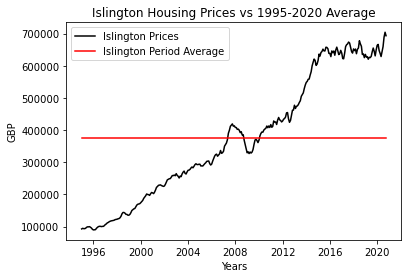

In [336]:
#Focus on  ('Islington', 'E09000019', 'London Boroughs')
plt.plot(properties3.columns, properties3.loc[('Islington', slice(None), slice(None)),:].mean(),'k')
islington_average = properties3.loc[('Islington', slice(None), slice(None)),:].mean().mean()*np.ones((len(properties3.columns),1))
#The above line could be handled better in terms of broadcasting the mean to the columns.
plt.plot(properties3.columns, islington_average,'r')
plt.title('Islington Housing Prices vs 1995-2020 Average')
plt.xlabel('Years')
plt.ylabel('GBP')
plt.legend(['Islington Prices','Islington Period Average'])
plt.show()



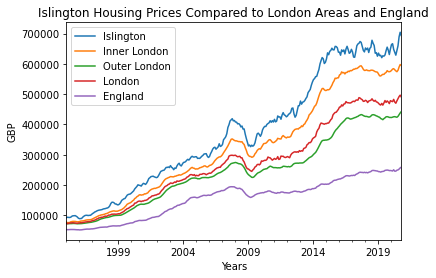

In [337]:
#Focus on  Islington vs London Areas, London and England

#No averaging needed - filter on the indices.

islington_filter = properties3.index.get_level_values(0) == 'Islington'
london_area_filter = properties3.index.get_level_values(2) == 'London Areas'
london_england_filter = properties3.index.get_level_values(0).isin(['LONDON', 'England'])
#print(london_filter)

islington_comparison_df = properties3[islington_filter | london_area_filter | london_england_filter]

islington_comparison_df.T.plot()


plt.title('Islington Housing Prices Compared to London Areas and England')
plt.xlabel('Years')
plt.ylabel('GBP')
plt.legend(islington_comparison_df.index.get_level_values(0).str.title())
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [338]:
properties_inc_over_period = properties3.apply(lambda x: x.divide(properties3.iloc[:,0]))

max_idx = properties_inc_over_period.iloc[:,0].idxmax()  #Find the borough that saw the greatest increase
max_inc = (properties_inc_over_period.iloc[:,-1][max_idx]-1)*100 #Find the increase
print('{0} had the highest housing value increase over the period with an increase of {1}%'.format(max_idx[0],np.round(max_inc,2)))


City of London had the highest housing value increase over the period with an increase of 688.95%


**3. Modeling**

Consider creating a function that will calculate a ratio of house pricemaxcomparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [344]:
def create_price_ratio(borough, properties):
    #print(properties.columns)
    year_filter_1998 = properties.columns.year == 1998
    year_filter_2008 = properties.columns.year == 2008
    #print(year_filter_1998)
    return properties.loc[(borough, slice(None),slice(None)), year_filter_2008].mean(axis=1)/properties.loc[(borough, slice(None), slice(None)), year_filter_1998].mean(axis=1)

#print(properties3.columns)
create_price_ratio("Islington", properties3) #it works, but decided not to use it

borough_filter = properties3.index.get_level_values(2)=='London Boroughs'
#print(borough_filter)
year_filter_1998 = properties3.columns.year == 1998
year_filter_2008 = properties3.columns.year == 2008

borough_price_changes_1998_2008 = properties3.loc[borough_filter, year_filter_2008].mean(axis=1) / properties3.loc[borough_filter, year_filter_1998].mean(axis=1)
borough_price_changes_percent_1998_2008 = (borough_price_changes_1998_2008-1)*100
print('Borough Price Changes from 1998 to 2008 (% chg)')
print(borough_price_changes_percent_1998_2008.sort_values(ascending = False))


Borough Price Changes from 1998 to 2008 (% chg)
London Borough        ID         Area Name      
Hackney               E09000012  London Boroughs    254.810714
Newham                E09000025  London Boroughs    227.714258
Southwark             E09000028  London Boroughs    218.596098
Barking & Dagenham    E09000002  London Boroughs    210.780980
Tower Hamlets         E09000030  London Boroughs    208.794053
Waltham Forest        E09000031  London Boroughs    208.224270
Lewisham              E09000023  London Boroughs    206.177596
Camden                E09000007  London Boroughs    193.647108
Kensington & Chelsea  E09000020  London Boroughs    192.466666
Brent                 E09000005  London Boroughs    190.744249
Wandsworth            E09000032  London Boroughs    190.109927
City of London        E09000001  London Boroughs    188.651824
Islington             E09000019  London Boroughs    188.330473
Lambeth               E09000022  London Boroughs    186.371814
Westminster          

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 